In [1]:
'''
Author: Aishik Chakraborty
Using batchnorm in Tensorflow
'''

import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

tf.set_random_seed(123)  # reproducibility

In [2]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images  # Returns np.array
train_labels = np.eye(10)[np.asarray(mnist.train.labels, dtype=np.int32)]
test_data = mnist.test.images  # Returns np.array
test_labels = np.eye(10)[np.asarray(mnist.test.labels, dtype=np.int32)]

learning_rate = 0.01
training_epochs = 50
batch_size = 100


class NN(object):
    def __init__(self, mode):
        self.use_batchnorm=mode
        # input place holders
        self.X = tf.placeholder(tf.float32, [None, 784])
        self.Y = tf.placeholder(tf.float32, [None, 10])
        self.mode = tf.placeholder(tf.bool, name='train_mode')

        self.h1 = tf.layers.dense(inputs=self.X, units=100)
        if self.use_batchnorm:
            self.h1 = tf.layers.batch_normalization(self.h1, training=self.mode)
        self.h1 = tf.nn.sigmoid(self.h1)
        self.h2 = tf.layers.dense(inputs=self.h1, units=100)
        if self.use_batchnorm:
            self.h2 = tf.layers.batch_normalization(self.h2, training=self.mode)
        self.h2 = tf.nn.sigmoid(self.h2)
        
        self.logits = tf.layers.dense(inputs=self.h2, units=10)
        if self.use_batchnorm:
            self.logits = tf.layers.batch_normalization(self.logits, training=self.mode)
        self.pred = tf.nn.softmax(self.logits)

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
        
        # When using the batchnormalization layers,
        # it is necessary to manually add the update operations
        # because the moving averages are not included in the graph            
        update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(update_ops):                     
            self.optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(self.cost)

        # Test model and check accuracy
        self.correct_prediction = tf.equal(tf.argmax(self.pred, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))



# initialize
nn = NN(0)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print 'Learning without batchnorm...'

loss_wo_batchnorm = []
acc_wo_batchnorm = []

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = train_data[(i)*batch_size:(i+1)*batch_size], train_labels[(i)*batch_size:(i+1)*batch_size]
        feed_dict = {nn.X: batch_xs, nn.Y: batch_ys}
        c, _ = sess.run([nn.cost, nn.optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        if i%10==0:
            acc = sess.run(nn.accuracy, feed_dict={
              nn.X: test_data, nn.Y: test_labels})
            acc_wo_batchnorm.append(acc)
    loss_wo_batchnorm.append(avg_cost)
    print 'Epoch : ' + str(epoch) + ' Loss: ' + str(avg_cost)
    acc = sess.run(nn.accuracy, feed_dict={
      nn.X: test_data, nn.Y: test_labels})
    acc_wo_batchnorm.append(acc)
    print('Accuracy:', acc)

    


sess.close()

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Learning without batchnorm...
Epoch : 0 Loss: 2.28698639089
('Accuracy:', 0.36459994)
Epoch : 1 Loss: 2.21964679068
('Accuracy:', 0.49679989)
Epoch : 2 Loss: 2.14397867333
('Accuracy:', 0.54359984)
Epoch : 3 Loss: 2.02773813421
('Accuracy:', 0.58169991)
Epoch : 4 Loss: 1.85663005027
('Accuracy:', 0.62269992)
Epoch : 5 Loss: 1.64329898531
('Accuracy:', 0.66929996)
Epoch : 6 Loss: 1.42831107855
('Accuracy:', 0.70590001)
Epoch : 7 Loss: 1.24313027219
('Accuracy:', 0.73689997)
Epoch : 8 Loss: 1.09468319839
('Accuracy:', 0.76200002)
Epoch : 9 Loss: 0.977631856637
('Accuracy:', 0.78280002)
Epoch : 10 Loss: 0.884318351962
('Accuracy:', 0.80079997)
Epoch : 11 Loss: 0.808701773286
('Accuracy:', 0.81180006)
Epoch : 12 Loss: 0.746755023653
('Accuracy:', 0.82270008)
Epoch : 13 Loss: 0.695674740239
('Accurac

Learning with batchnorm...
Epoch : 0 Loss: 0.870565959053
('Accuracy:', 0.88020015)
Epoch : 1 Loss: 0.579991946491
('Accuracy:', 0.89640015)
Epoch : 2 Loss: 0.484203346101
('Accuracy:', 0.90630013)
Epoch : 3 Loss: 0.425970396074
('Accuracy:', 0.91200012)
Epoch : 4 Loss: 0.384215450422
('Accuracy:', 0.91740012)
Epoch : 5 Loss: 0.350947063647
('Accuracy:', 0.92210013)
Epoch : 6 Loss: 0.322566376179
('Accuracy:', 0.92530012)
Epoch : 7 Loss: 0.297531509007
('Accuracy:', 0.92960012)
Epoch : 8 Loss: 0.275370676104
('Accuracy:', 0.93200016)
Epoch : 9 Loss: 0.255887368003
('Accuracy:', 0.93420011)
Epoch : 10 Loss: 0.23875776763
('Accuracy:', 0.93680006)
Epoch : 11 Loss: 0.223600008562
('Accuracy:', 0.9392001)
Epoch : 12 Loss: 0.210085467073
('Accuracy:', 0.94160014)
Epoch : 13 Loss: 0.197957543433
('Accuracy:', 0.94340014)
Epoch : 14 Loss: 0.187015985796
('Accuracy:', 0.94520009)
Epoch : 15 Loss: 0.177099446834
('Accuracy:', 0.94610012)
Epoch : 16 Loss: 0.168072922826
('Accuracy:', 0.94770014)

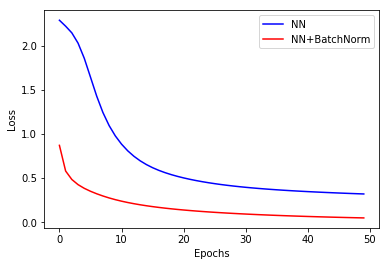

In [3]:
# initialize
bn = NN(1)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print 'Learning with batchnorm...'

loss_w_batchnorm = []
acc_w_batchnorm = []


# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = train_data[(i)*batch_size:(i+1)*batch_size], train_labels[(i)*batch_size:(i+1)*batch_size]
        feed_dict = {bn.X: batch_xs, bn.Y: batch_ys, bn.mode:True}
        c, _ = sess.run([bn.cost, bn.optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        if i%10==0:
            acc = sess.run(bn.accuracy, feed_dict={
                  bn.X: test_data, bn.Y: test_labels, bn.mode:False})
            acc_w_batchnorm.append(acc)
    loss_w_batchnorm.append(avg_cost)
    
    print 'Epoch : ' + str(epoch) + ' Loss: ' + str(avg_cost)
    acc = sess.run(bn.accuracy, feed_dict={
      bn.X: test_data, bn.Y: test_labels, bn.mode:False})
    print('Accuracy:',acc)
    acc_w_batchnorm.append(acc)

sess.close()

plt.plot(range(training_epochs), loss_wo_batchnorm, 'b')
plt.plot(range(training_epochs), loss_w_batchnorm, 'r')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['NN', 'NN+BatchNorm'])
plt.show()


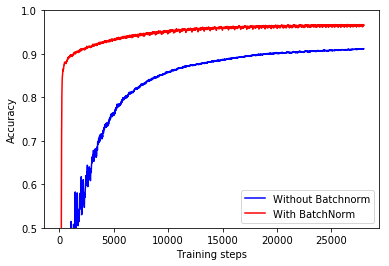

In [6]:
plt.plot(range(0, len(acc_wo_batchnorm)*10, 10), acc_wo_batchnorm, 'b')
plt.plot(range(0, len(acc_w_batchnorm)*10, 10), acc_w_batchnorm, 'r')
plt.ylabel('Accuracy')
plt.xlabel('Training steps')
plt.ylim([0.5,1])
plt.legend(['Without Batchnorm', 'With BatchNorm'])
plt.show()
